<a href="https://colab.research.google.com/github/alexc6h6/Sequences-Model-RNN/blob/master/BBC_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks in Natural Language Processing



*   Tokenize text data
*   Texts to sequences
*   Word embedding
*   Bidirection Neural Networks
*   Long short-term memory(LSTM)






In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/drive')

!ls '/content/drive/My Drive/BBC_NEWS'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'BBC News Sample Solution.csv'	'BBC News Test.csv'  'BBC News Train.csv'


In [0]:
train = pd.read_csv('/content/drive/My Drive/BBC_NEWS/BBC News Train.csv')
test = pd.read_csv('/content/drive/My Drive/BBC_NEWS/BBC News Test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [5]:
print(train.shape)
print(train.head(5))

print(test.shape)
print(test.head(5))

(1490, 3)
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
(735, 2)
   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...


In [6]:
train['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [44]:

le = LabelEncoder()
ohe = OneHotEncoder(categories = 'auto')

num_train_labels = le.fit_transform(train['Category']).reshape(-1, 1)

ohe.fit(num_train_labels)
ohe_train_labels = ohe.transform(num_train_labels).toarray()

print(ohe_train_labels.shape)


(1490, 5)


In [45]:
#tokenize the texts data

max_words = 15000
max_len = 200

tokenizer = Tokenizer(num_words = max_words, oov_token = '<ovv>')
tokenizer.fit_on_texts(train['Text'])

word_index = tokenizer.word_index
print(word_index)
print(len(word_index))

{'<ovv>': 1, 'the': 2, 'to': 3, 'of': 4, 'and': 5, 'a': 6, 'in': 7, 's': 8, 'for': 9, 'is': 10, 'that': 11, 'it': 12, 'on': 13, 'said': 14, 'was': 15, 'he': 16, 'be': 17, 'with': 18, 'has': 19, 'as': 20, 'have': 21, 'at': 22, 'by': 23, 'will': 24, 'but': 25, 'are': 26, 'i': 27, 'from': 28, 'not': 29, 'they': 30, 'mr': 31, 'his': 32, 'an': 33, 'we': 34, 'this': 35, 'which': 36, 'would': 37, 'had': 38, 'their': 39, 'been': 40, 'more': 41, 'year': 42, 'its': 43, 'up': 44, 'were': 45, 'also': 46, 'who': 47, 'new': 48, 'people': 49, 'us': 50, 'one': 51, 'there': 52, 'about': 53, 'after': 54, 'out': 55, 'can': 56, 'or': 57, 'all': 58, 'could': 59, 'than': 60, 'if': 61, 'over': 62, 'you': 63, 'first': 64, 'when': 65, 'last': 66, 'two': 67, 'time': 68, 'world': 69, 't': 70, 'other': 71, 'now': 72, 'uk': 73, 'into': 74, 'government': 75, 'she': 76, 'some': 77, 'so': 78, 'what': 79, 'only': 80, 'against': 81, 'film': 82, 'them': 83, 'years': 84, 'no': 85, 'best': 86, 'just': 87, 'make': 88, 'do'

In [0]:
#transform text data into numeric sequences data

train_sequences = tokenizer.texts_to_sequences(train['Text'])
test_sequences = tokenizer.texts_to_sequences(test['Text'])

#max_len = np.max([len(x) for x in train_sequences])
#print(max_len)


In [50]:
#pad sequences data in the same length

train_padded = pad_sequences(train_sequences, maxlen = max_len, padding = 'post')
test_padded = pad_sequences(test_sequences, maxlen = max_len, padding = 'post')

print(train_padded.shape)


(1490, 200)


In [55]:
#word embedding
#recurrent NN(RNN)

model = tf.keras.models.Sequential([Embedding(max_words, 64, input_length = max_len),
                                    Bidirectional(LSTM(32, return_sequences = True)),
                                    Bidirectional(LSTM(32, return_sequences = True)),

                                    Bidirectional(LSTM(32)),
                                    Dropout(0.5),
                                    Dense(128, kernel_regularizer = regularizers.l2(0.5)),
                                    BatchNormalization(),
                                    Activation('relu'),
                                    Dropout(0.5),
                                    Dense(units = 5, activation = 'softmax')])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 64)           960000    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 200, 64)           24832     
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 200, 64)           24832     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 64)                24832     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

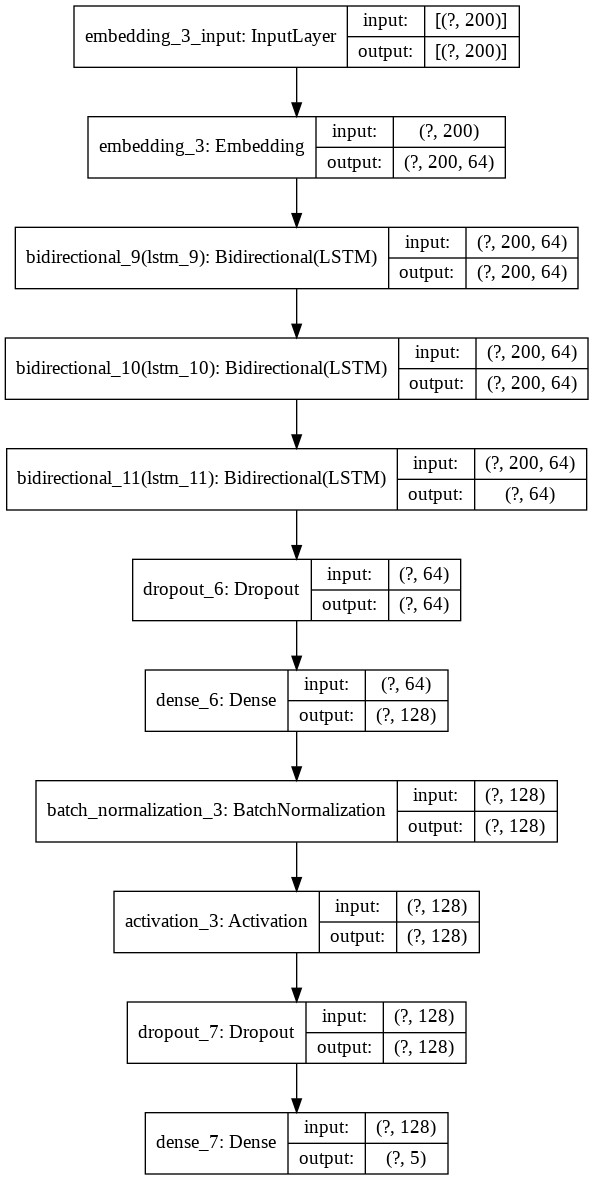

In [56]:
plot_model(model, show_shapes = True)

In [0]:
#reduce learning rate when it is on plateau

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, verbose = 1, min_lr = 0.000001)

In [58]:
#training model

epochs = 50
batch = 128

history = model.fit(x_train, y_train,
                    epochs = epochs, 
                    verbose = 1,
                    batch_size = batch, 
                    validation_split = 0.1,
                    callbacks = [reduce_lr])

Epoch 1/50
9/9 [==============================] - 2s 257ms/step - loss: 41.9263 - acc: 0.2155 - val_loss: 38.3313 - val_acc: 0.2750 - lr: 0.0010
Epoch 2/50
9/9 [==============================] - 1s 64ms/step - loss: 35.9518 - acc: 0.3200 - val_loss: 32.8409 - val_acc: 0.2833 - lr: 0.0010
Epoch 3/50
9/9 [==============================] - 1s 61ms/step - loss: 30.6307 - acc: 0.4487 - val_loss: 28.0406 - val_acc: 0.3583 - lr: 0.0010
Epoch 4/50
9/9 [==============================] - 1s 62ms/step - loss: 25.8203 - acc: 0.5924 - val_loss: 23.8565 - val_acc: 0.5917 - lr: 0.0010
Epoch 5/50
9/9 [==============================] - 1s 61ms/step - loss: 21.6480 - acc: 0.6558 - val_loss: 20.1984 - val_acc: 0.7000 - lr: 0.0010
Epoch 6/50
9/9 [==============================] - 1s 60ms/step - loss: 18.0586 - acc: 0.7799 - val_loss: 16.9306 - val_acc: 0.8500 - lr: 0.0010
Epoch 7/50
9/9 [==============================] - 1s 60ms/step - loss: 15.0804 - acc: 0.8629 - val_loss: 14.3780 - val_acc: 0.8250 - lr

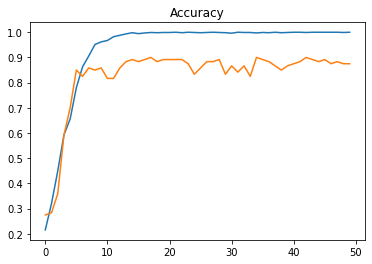

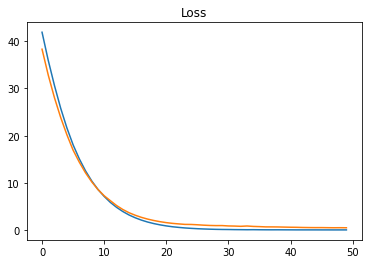

In [59]:
#plot training history

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

In [0]:
model.save('BBCNEWS.h5')